In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import BayesianRidge,Ridge, Lasso
from sklearn.model_selection import train_test_split, KFold, cross_val_score
import tensorflow as tf
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from catboost import CatBoostRegressor
from mlxtend.regressor import StackingRegressor
import warnings


warnings.filterwarnings("ignore")

# EXPLORATORY DATA ANALYSIS

In [2]:
laptop= pd.read_csv("laptops.csv")
laptop.head()

CompanyName        TypeOfLaptop     Inches  \
0         MSI     Business Laptop  17.040680   
1       Chuwi  2 in 1 Convertible  16.542395   
2          hp         WorkStation  17.295294   
3         MSI  2 in 1 Convertible  11.526203   
4   Microsoft              Gaming  12.649634   

                     ScreenResolution                   Cpu   Ram  \
0  IPS Panel Retina Display 2560x1600         Intel Core i7  12GB   
1                             Full HD         Intel Core i5  12GB   
2                             Full HD  Intel Xeon E3-1505M    8GB   
3                                  2K         Intel Core i7  16GB   
4                             Full HD         Intel Core i5   8GB   

           Memory                     Gpu       OpSys    Weight         Price  
0       512GB SSD  Intel Iris Xe Graphics       Linux  2.064834  35844.099371  
1  128GB PCIe SSD  Intel Iris Xe Graphics       No OS  4.060656  37019.059051  
2         1TB HDD  Intel Iris Xe Graphics       Linux  2.901689  33329.360341  
3  512GB NVMe SSD  Intel Iris Xe Graphics  Windows 10  2.914843  68631.102486  
4       512GB SSD     AMD Radeon RX 5600M  Windows 10  4.341995  33842.479566

In [3]:
laptop.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   CompanyName       1000 non-null   object 
 1   TypeOfLaptop      1000 non-null   object 
 2   Inches            1000 non-null   float64
 3   ScreenResolution  1000 non-null   object 
 4   Cpu               1000 non-null   object 
 5   Ram               1000 non-null   object 
 6   Memory            1000 non-null   object 
 7   Gpu               1000 non-null   object 
 8   OpSys             1000 non-null   object 
 9   Weight            1000 non-null   float64
 10  Price             1000 non-null   float64
dtypes: float64(3), object(8)
memory usage: 86.1+ KB


In [4]:
laptop["CompanyName"]=laptop["CompanyName"].replace("lenevo","Lenovo").replace("hp","Hp")

In [5]:
laptop["CompanyName"].value_counts()

CompanyName
MSI          128
Microsoft    118
Apple        113
Lenovo       113
Asus         112
Chuwi        109
Acer         107
Dell         101
Hp            99
Name: count, dtype: int64

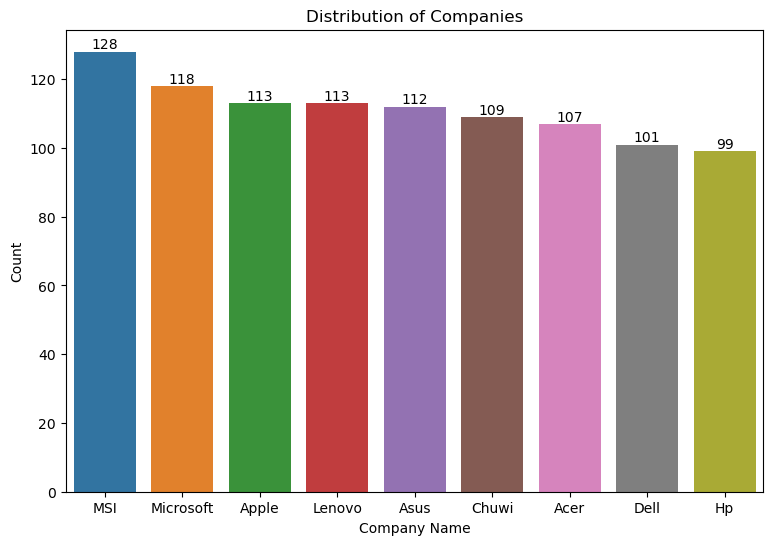

In [6]:
laptop_companies = laptop["CompanyName"].value_counts().reset_index()

plt.figure(figsize=(9,6))
ax=sns.barplot(x="CompanyName",y="count",data=laptop_companies,hue="CompanyName")
plt.xlabel("Company Name")
plt.ylabel("Count")
plt.title("Distribution of Companies")
    
for container in ax.containers:
    ax.bar_label(container, fmt="%.0f")

In [7]:
laptop["TypeOfLaptop"].value_counts().reset_index()

TypeOfLaptop  count
0     Business Laptop    176
1         WorkStation    175
2              Gaming    168
3           UltraBook    166
4  2 in 1 Convertible    162
5            NoteBook    153

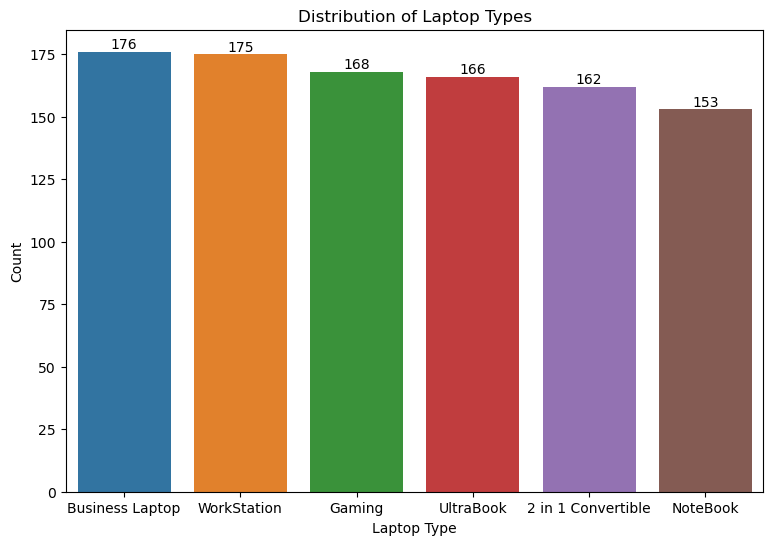

In [8]:
laptop_types = laptop["TypeOfLaptop"].value_counts().reset_index()

plt.figure(figsize=(9,6))
ax=sns.barplot(x="TypeOfLaptop",y="count",data=laptop_types,hue="TypeOfLaptop")
plt.xlabel("Laptop Type")
plt.ylabel("Count")
plt.title("Distribution of Laptop Types")
    
for container in ax.containers:
    ax.bar_label(container, fmt="%.0f")

Text(0.5, 1.0, 'Inches per Company')

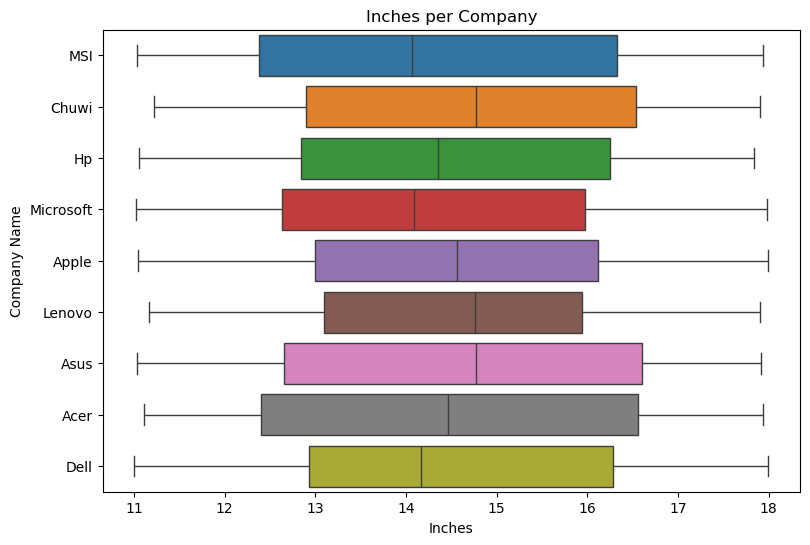

In [9]:
plt.figure(figsize=(9,6))
sns.boxplot(data=laptop,y="CompanyName",x="Inches",hue="CompanyName")
plt.ylabel("Company Name")
plt.xlabel("Inches")
plt.title("Inches per Company")

In [10]:
laptop["ScreenResolution"].value_counts().reset_index()

ScreenResolution  count
0                                         2K    181
1                                         4K    179
2  IPS Panel Full HD / Touchscreen 1920x1080    176
3                                    Full HD    162
4                              HD 1920x1080     160
5         IPS Panel Retina Display 2560x1600    142

In [11]:
laptop["Cpu"].value_counts().reset_index()

Cpu  count
0            Intel Xeon E3-1505M     114
1             Intel Atom x5-Z8550    111
2                   Intel Core i5    105
3   Intel Pentium Quad Core N4200    101
4  Intel Celeron Dual Core 3855U      98
5                   Intel Core i7     96
6                   Intel Core i9     95
7                     AMD Ryzen 5     94
8                     AMD Ryzen 7     94
9              AMD A9-Series 9420     92

Text(0.5, 1.0, 'Distribution of CPU Manufacturers')

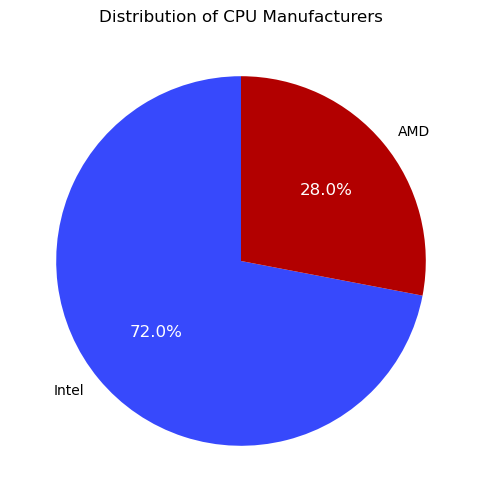

In [12]:
cpu=laptop["Cpu"].str.split(" ",expand=True)[0].value_counts()

plt.figure(figsize=(9,6))

patches, texts, autotexts = plt.pie(cpu,labels=cpu.index,autopct='%1.1f%%', startangle=90, colors=["#3749fc","#b20000"])

for autotext in autotexts:
    autotext.set_color('white')
    autotext.set_fontsize(12)
    
plt.title("Distribution of CPU Manufacturers")

In [13]:
Cpu_Man=laptop["Cpu"].str.split(" ",expand=True)[0]
laptop.insert(loc=4,column="Cpu_Manuf",value=Cpu_Man)

In [14]:
Cpu_model=laptop["Cpu"].str.split(" ",n=1,expand=True)[1]
laptop.insert(loc=5,column="Cpu_Model",value=Cpu_model)

In [15]:
laptop.drop(columns="Cpu",inplace=True)

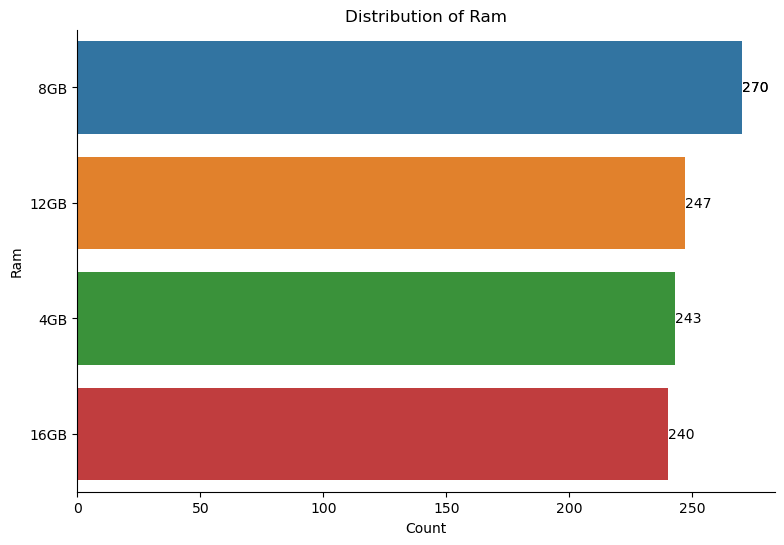

In [16]:
Rams=laptop["Ram"].value_counts().sort_values(ascending=False).reset_index()

plt.figure(figsize=(9,6))
ax=sns.barplot(data=Rams,y="Ram",x="count",hue="Ram")
ax.bar_label(ax.containers[0])
sns.despine(right=True,top=True)
plt.ylabel("Ram")
plt.xlabel("Count")
plt.title("Distribution of Ram")

for container in ax.containers:
    ax.bar_label(container)

In [17]:
memory_split=laptop["Memory"].str.split(" ",n=1,expand=True)
memory_split.columns=["memory_size","memory_model"]
memory_split

memory_size  memory_model
0         512GB           SSD
1         128GB      PCIe SSD
2           1TB           HDD
3         512GB      NVMe SSD
4         512GB           SSD
..          ...           ...
995       128GB           SSD
996         2TB      SATA SSD
997       128GB      PCIe SSD
998         1TB  Fusion Drive
999         4TB           HDD

[1000 rows x 2 columns]

In [18]:
laptop.insert(loc=7,column="memory_size",value=memory_split["memory_size"])

In [19]:
laptop.insert(loc=8,column="memory_model",value=memory_split["memory_model"])
laptop.drop(columns="Memory",inplace=True)

In [20]:
laptop["Gpu"].str.split(" ",n=1,expand=True)[1]

0      Iris Xe Graphics
1      Iris Xe Graphics
2      Iris Xe Graphics
3      Iris Xe Graphics
4       Radeon RX 5600M
             ...       
995     Radeon RX 5600M
996    GeForce GTX 1650
997    GeForce GTX 1650
998    Iris Xe Graphics
999    Iris Xe Graphics
Name: 1, Length: 1000, dtype: object

In [21]:
Gpu_Man=laptop["Gpu"].str.split(" ",expand=True)[0]
laptop.insert(loc=9,column="Gpu_Manuf",value=Gpu_Man)

In [22]:
Gpu_model=laptop["Gpu"].str.split(" ",n=1,expand=True)[1]
laptop.insert(loc=10,column="Gpu_Model",value=Gpu_model)

In [23]:
laptop.drop(columns="Gpu",inplace=True)

[Text(0, 0, '348'), Text(0, 0, '339'), Text(0, 0, '313')]

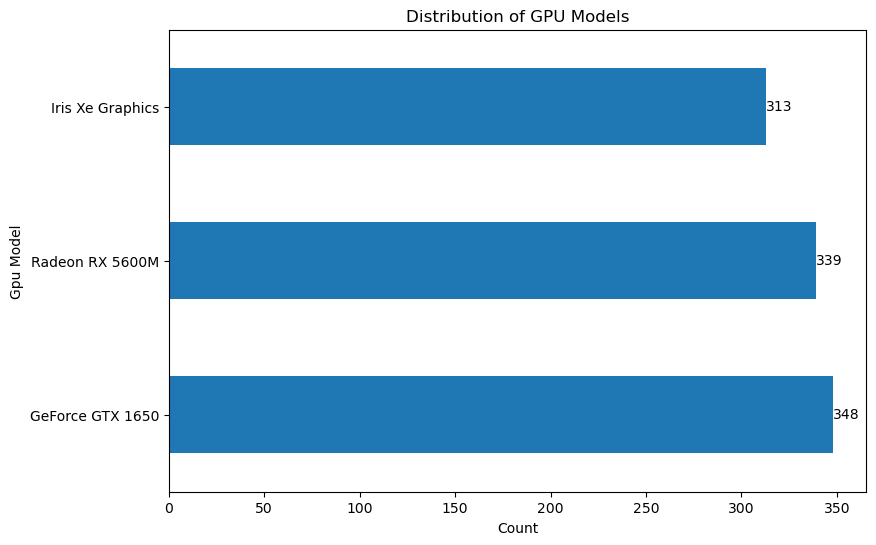

In [24]:
plt.figure(figsize=(9,6))
ax=laptop["Gpu_Model"].value_counts().plot(kind="barh")
plt.xlabel("Count")
plt.ylabel("Gpu Model")
plt.title("Distribution of GPU Models")
ax.bar_label(ax.containers[0])

Text(0.5, 1.0, 'Price Distribution of GPU Models')

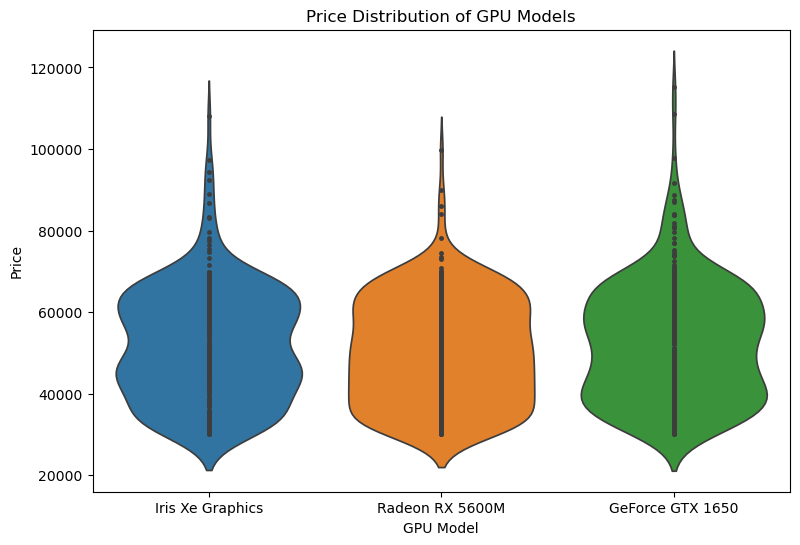

In [25]:
plt.figure(figsize=(9,6))
sns.violinplot(data=laptop,y="Price",x="Gpu_Model", inner="point", density_norm="count",hue="Gpu_Model")
plt.xlabel("GPU Model")
plt.title("Price Distribution of GPU Models")

[Text(0, 0, '176'),
 Text(0, 0, '187'),
 Text(0, 0, '194'),
 Text(0, 0, '219'),
 Text(0, 0, '224')]

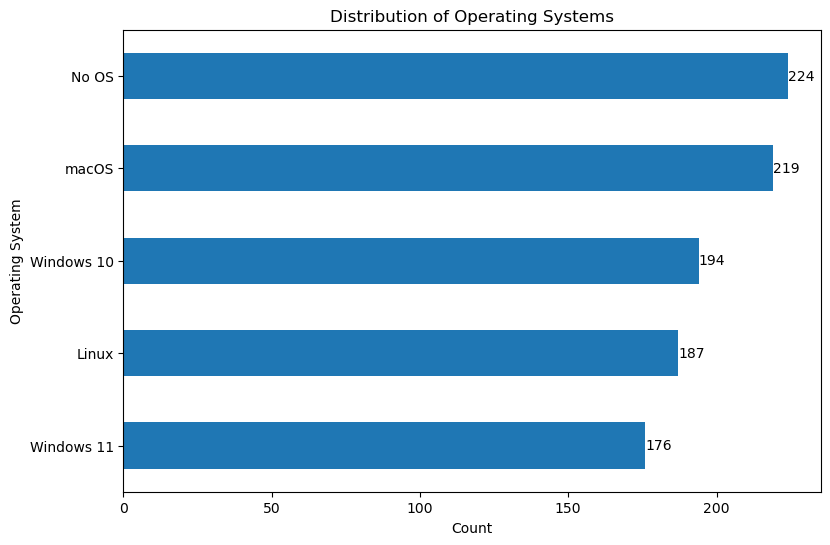

In [26]:
plt.figure(figsize=(9,6))
ax=laptop["OpSys"].value_counts().sort_values().plot(kind="barh")
plt.xlabel("Count")
plt.ylabel("Operating System")
plt.title("Distribution of Operating Systems")
ax.bar_label(ax.containers[0])

# PRE-PROCCESSING FOR MACHINE LEARNING

In [27]:
laptop.head()

CompanyName        TypeOfLaptop     Inches  \
0         MSI     Business Laptop  17.040680   
1       Chuwi  2 in 1 Convertible  16.542395   
2          Hp         WorkStation  17.295294   
3         MSI  2 in 1 Convertible  11.526203   
4   Microsoft              Gaming  12.649634   

                     ScreenResolution Cpu_Manuf       Cpu_Model   Ram  \
0  IPS Panel Retina Display 2560x1600     Intel         Core i7  12GB   
1                             Full HD     Intel         Core i5  12GB   
2                             Full HD     Intel  Xeon E3-1505M    8GB   
3                                  2K     Intel         Core i7  16GB   
4                             Full HD     Intel         Core i5   8GB   

  memory_size memory_model Gpu_Manuf         Gpu_Model       OpSys    Weight  \
0       512GB          SSD     Intel  Iris Xe Graphics       Linux  2.064834   
1       128GB     PCIe SSD     Intel  Iris Xe Graphics       No OS  4.060656   
2         1TB          HDD     Intel  Iris Xe Graphics       Linux  2.901689   
3       512GB     NVMe SSD     Intel  Iris Xe Graphics  Windows 10  2.914843   
4       512GB          SSD       AMD   Radeon RX 5600M  Windows 10  4.341995   

          Price  
0  35844.099371  
1  37019.059051  
2  33329.360341  
3  68631.102486  
4  33842.479566

In [28]:
company_names=pd.get_dummies(laptop["CompanyName"],prefix="comp_name",dtype=int)
typeoflaptops=pd.get_dummies(laptop["TypeOfLaptop"],prefix="laptopT",dtype=int)
screen=pd.get_dummies(laptop["ScreenResolution"],prefix="screen",dtype=int)
cpu_manuf=pd.get_dummies(laptop["Cpu_Manuf"],prefix="cpu",dtype=int)
cpu_model=pd.get_dummies(laptop["Cpu_Model"],prefix="cpu",dtype=int)
rams=pd.get_dummies(laptop["Ram"],prefix="ram",dtype=int)
memory_size=pd.get_dummies(laptop["memory_size"],prefix="memory",dtype=int)
memory_model=pd.get_dummies(laptop["memory_model"],prefix="memory",dtype=int)
gpu_manuf=pd.get_dummies(laptop["Gpu_Manuf"],prefix="gpu",dtype=int)
gpu_model=pd.get_dummies(laptop["Gpu_Model"],prefix="gpu",dtype=int)
opsys=pd.get_dummies(laptop["OpSys"],prefix="sys",dtype=int)

In [29]:
laptop_prepros=pd.concat([company_names,typeoflaptops,screen,cpu_manuf,cpu_model,rams,memory_size,memory_model,gpu_manuf,gpu_model,opsys],axis="columns")

In [30]:
minmax=MinMaxScaler()

In [31]:
laptop_prepros["Inches_pre"]=minmax.fit_transform(laptop[["Inches"]])

In [32]:
laptop_prepros["Weight_pre"]=minmax.fit_transform(laptop[["Weight"]])

In [33]:
laptop_prepros.head()

comp_name_Acer  comp_name_Apple  comp_name_Asus  comp_name_Chuwi  \
0               0                0               0                0   
1               0                0               0                1   
2               0                0               0                0   
3               0                0               0                0   
4               0                0               0                0   

   comp_name_Dell  comp_name_Hp  comp_name_Lenovo  comp_name_MSI  \
0               0             0                 0              1   
1               0             0                 0              0   
2               0             1                 0              0   
3               0             0                 0              1   
4               0             0                 0              0   

   comp_name_Microsoft  laptopT_2 in 1 Convertible  ...  gpu_GeForce GTX 1650  \
0                    0                           0  ...                     0   
1                    0                           1  ...                     0   
2                    0                           0  ...                     0   
3                    0                           1  ...                     0   
4                    1                           0  ...                     0   

   gpu_Iris Xe Graphics  gpu_Radeon RX 5600M  sys_Linux  sys_No OS  \
0                     1                    0          1          0   
1                     1                    0          0          1   
2                     1                    0          1          0   
3                     1                    0          0          0   
4                     0                    1          0          0   

   sys_Windows 10  sys_Windows 11  sys_macOS  Inches_pre  Weight_pre  
0               0               0          0    0.862990    0.021383  
1               0               0          0    0.791734    0.688049  
2               0               0          0    0.899400    0.300918  
3               1               0          0    0.074412    0.305312  
4               1               0          0    0.235064    0.782025  

[5 rows x 66 columns]

In [34]:
X=laptop_prepros
y=laptop["Price"]

# train-test-split

In [35]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.05, random_state=42)

# feature importance

In [36]:
from sklearn.ensemble import RandomForestRegressor

forest = RandomForestRegressor(random_state=0)
forest.fit(X_train, y_train)

RandomForestRegressor(random_state=0)

In [37]:
importances=forest.feature_importances_
forest_importances = pd.Series(importances, index=X.columns).sort_values(ascending=False)

In [38]:
forest_importances.sort_values(ascending=False)

ram_8GB                 0.125088
Weight_pre              0.123357
Inches_pre              0.123212
ram_12GB                0.046807
comp_name_Dell          0.041581
                          ...   
cpu_AMD                 0.004630
memory_SSHD             0.004125
memory_Flash Storage    0.004099
memory_Fusion Drive     0.003444
memory_SATA SSD         0.003052
Length: 66, dtype: float64

Text(0, 0.5, 'Feature')

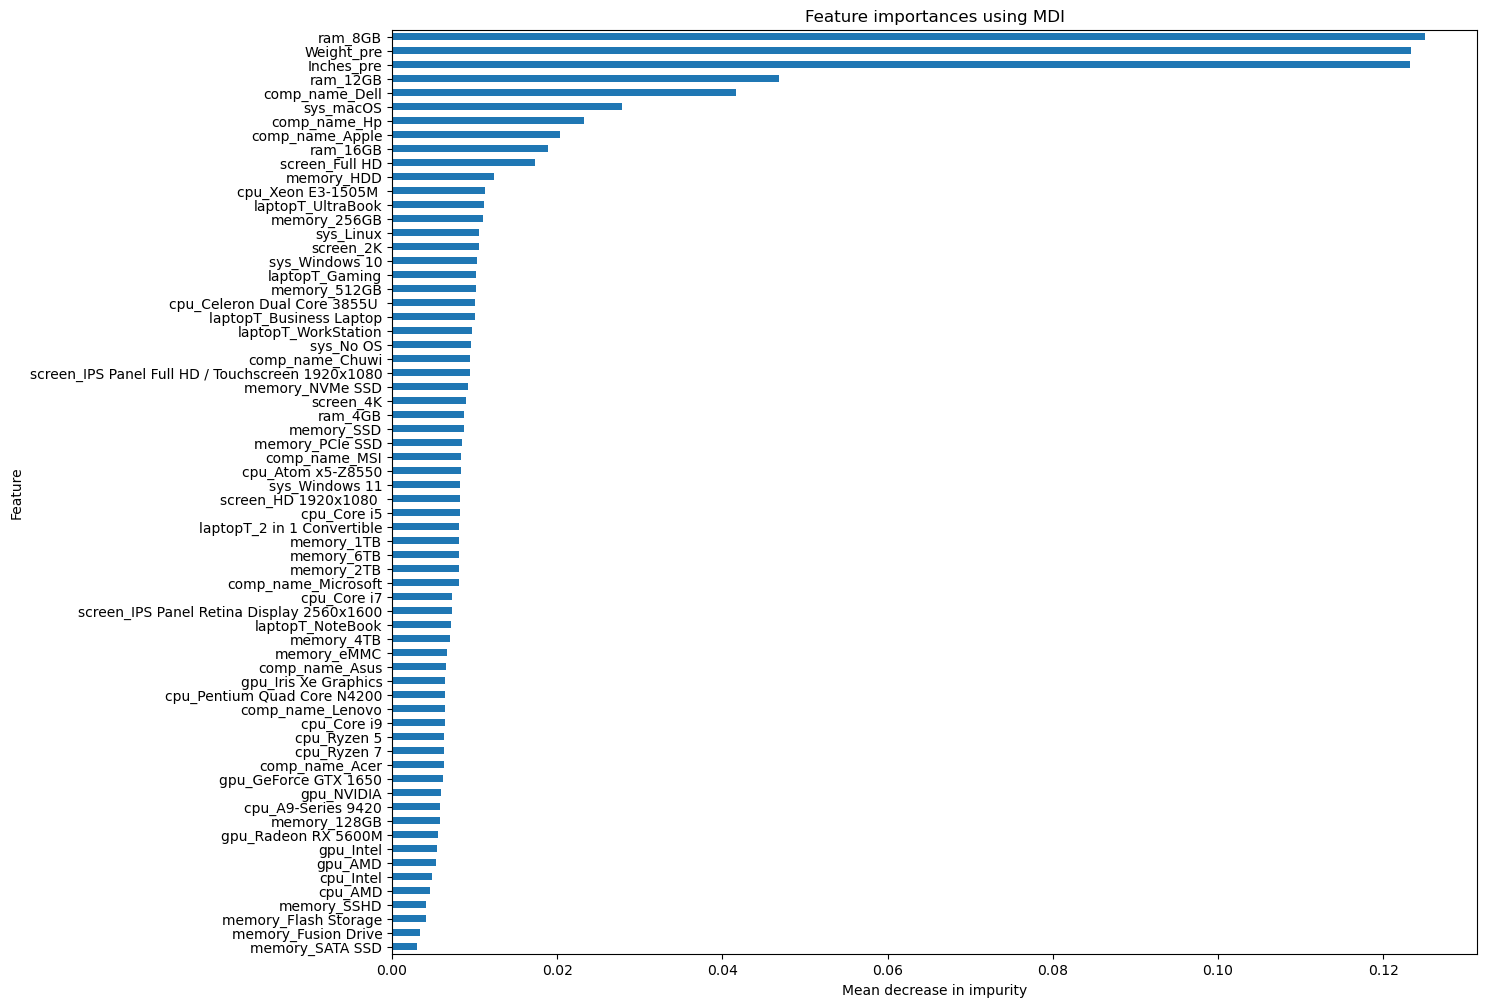

In [39]:
plt.figure(figsize=(14,12))
forest_importances.sort_values().plot.barh()
plt.title("Feature importances using MDI")
plt.xlabel("Mean decrease in impurity")
plt.ylabel("Feature")

# MODEL TRAINING


In [40]:
models = {
    'ridge' : Ridge(),
    'xgboost' : XGBRegressor(),
    'catboost' : CatBoostRegressor(verbose=0),
    'lightgbm' : LGBMRegressor(),
    'gradient boosting' : GradientBoostingRegressor(),
    'lasso' : Lasso(),
    'support vector': SVR(),
    'ada boost regressor': AdaBoostRegressor(),
    'bayesian_ridge': BayesianRidge()
}

In [41]:
for name, model in models.items():
    model.fit(X_train, y_train)

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000093 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 638
[LightGBM] [Info] Number of data points in the train set: 950, number of used features: 66
[LightGBM] [Info] Start training from score 51635.334827


## Neural Network

In [42]:
modelann = tf.keras.Sequential()

modelann.add(tf.keras.layers.Dense(79))
modelann.add(tf.keras.layers.Dense(200))
modelann.add(tf.keras.layers.Dense(200))
modelann.add(tf.keras.layers.Dense(200))
modelann.add(tf.keras.layers.Dense(1))



In [43]:
modelann.compile(
    loss = 'mse', 
    optimizer = tf.keras.optimizers.Adam(), 
    metrics = [tf.keras.metrics.RootMeanSquaredError(name='rmse')]
)

In [44]:
modelann.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=30)

Epoch 1/30
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 2837366016.0000 - rmse: 53266.4336 - val_loss: 2689558272.0000 - val_rmse: 51860.9531
Epoch 2/30
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 2413792768.0000 - rmse: 48998.7305 - val_loss: 220835408.0000 - val_rmse: 14860.5322
Epoch 3/30
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 267393120.0000 - rmse: 16331.7119 - val_loss: 212236592.0000 - val_rmse: 14568.3418
Epoch 4/30
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 194263568.0000 - rmse: 13932.2334 - val_loss: 204312336.0000 - val_rmse: 14293.7871
Epoch 5/30
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 180404592.0000 - rmse: 13409.1582 - val_loss: 203981408.0000 - val_rmse: 14282.2061
Epoch 6/30
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 180509632.0000 - rmse: 13427.7256 - val_loss: 206819856.0000 - val_rmse: 14381.2324
Epoch 7/30
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 188870304.0000 - rmse: 13739.6191 - val_loss: 207736560.0000 - val_rmse: 14413.0693
Epo

Text(0.5, 0.98, 'Model Performance Metrics Over Epochs')

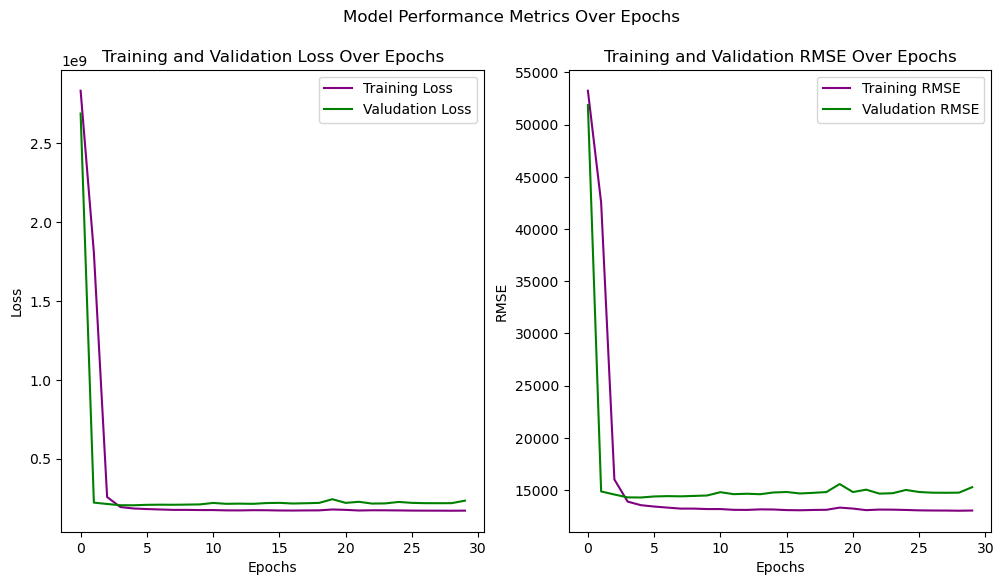

In [45]:
fig,ax=plt.subplots(1,2,figsize=(12,6))


ax[0].plot(np.arange(30),modelann.history.history["loss"],label="Training Loss",color="purple")
ax[0].plot(np.arange(30),modelann.history.history["val_loss"],label="Valudation Loss",color="g")
ax[0].set_xlabel("Epochs")
ax[0].set_ylabel("Loss")
ax[0].set_title("Training and Validation Loss Over Epochs")

ax[0].legend()

ax[1].plot(np.arange(30),modelann.history.history["rmse"],label="Training RMSE",color="purple")
ax[1].plot(np.arange(30),modelann.history.history["val_rmse"],label="Valudation RMSE",color="g")
ax[1].set_xlabel("Epochs")
ax[1].set_ylabel("RMSE")
ax[1].set_title("Training and Validation RMSE Over Epochs")
ax[1].legend()

fig.suptitle("Model Performance Metrics Over Epochs")

In [46]:
RMSE_ann = modelann.evaluate(X_test, y_test)[1]

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 242236560.0000 - rmse: 15558.6250


In [47]:
modelann.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 79)                  │           5,293 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 200)                 │          16,000 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 200)                 │          40,200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 200)                 │          40,200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 1)                   │             201 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 305,684 (1.17 MB)

 Trainable params: 101,894 (398.02 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 203,790 (796.06 KB)

## Cross Validation

In [48]:
results = {}
kf = KFold(n_splits= 10)

for name, model in models.items():
    result = np.mean(np.sqrt(-cross_val_score(model, X_train, y_train, scoring = 'neg_mean_squared_error', cv= kf)))
    results[name] = result

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000095 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 638
[LightGBM] [Info] Number of data points in the train set: 855, number of used features: 66
[LightGBM] [Info] Start training from score 51495.471409
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000106 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 638
[LightGBM] [Info] Number of data points in the train set: 855, number of used features: 66
[LightGBM] [Info] Start training from score 51746.399890
[Lig

In [49]:
results['ANN'] = RMSE_ann

In [50]:
results_df = pd.DataFrame(results, index=range(0,1)).T.rename(columns={0: 'RMSE'}).sort_values('RMSE', ascending=False)
results_df.T

ANN         lasso         ridge  support vector  \
RMSE  15270.738281  13777.037694  13769.903246    13757.591859   

      bayesian_ridge       xgboost      lightgbm      catboost  \
RMSE    13561.275891  13359.673502  13090.156152  12957.240769   

      gradient boosting  ada boost regressor  
RMSE       12473.225956         12450.579254

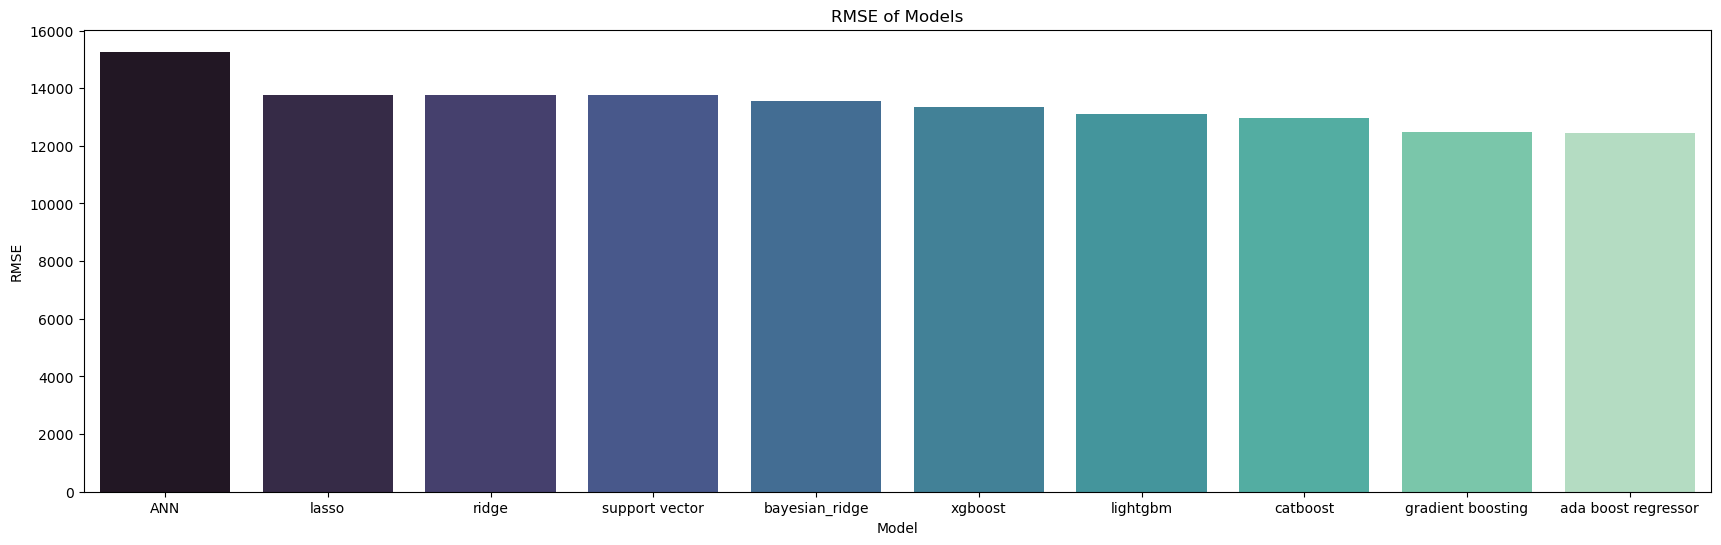

In [51]:
plt.figure(figsize = (21, 6))
sns.barplot(x= results_df.index, y = results_df['RMSE'], palette = 'mako')
plt.xlabel('Model')
plt.ylabel('RMSE')
plt.title('RMSE of Models');

## Weighted Ensemble Learning

In [52]:
weighted_predictions = (
    0.50 * models['ada boost regressor'].predict(X_test) +
    0.20 * models['catboost'].predict(X_test) +
    0.15 * models['gradient boosting'].predict(X_test) +
    0.10 * models['lightgbm'].predict(X_test) + 
    0.05 * models['xgboost'].predict(X_test)
) 
f'RMSE: {np.sqrt(mean_squared_error(y_test, weighted_predictions))}'

'RMSE: 12141.766210034975'

In [53]:
weighted_pred_rmse=np.sqrt(mean_squared_error(y_test, weighted_predictions))
results["weighted prediction"]=weighted_pred_rmse

## Stacking Learning

In [54]:
basereg1= GradientBoostingRegressor()
basereg2= CatBoostRegressor(verbose=0)
basereg3= LGBMRegressor()
basereg4= XGBRegressor()

meta_learner= AdaBoostRegressor()

In [55]:
stacking_regressor = StackingRegressor(regressors=[basereg1,basereg2,basereg3,basereg4],
                                        meta_regressor=meta_learner)

In [56]:
stacking_rmse=np.mean(np.sqrt(-cross_val_score(stacking_regressor,X_train,y_train,cv=kf,scoring='neg_mean_squared_error')))

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000093 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 638
[LightGBM] [Info] Number of data points in the train set: 855, number of used features: 66
[LightGBM] [Info] Start training from score 51495.471409
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000097 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 638
[LightGBM] [Info] Number of data points in the train set: 855, number of used features: 66
[LightGBM] [Info] Start training from score 51746.399890
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [In

In [57]:
results["stacking"] = stacking_rmse
stacking_rmse

13527.96158116028

## Simple Averaging Learning

In [58]:
preds=[]
for name, modela in models.items():
    pre=modela.predict(X_test)
    preds.append(pre)

In [59]:
models_prediction=[model.predict(X_test) for model in models.values()]

In [60]:
summed_prediction=sum(models_prediction)
simple_avg = summed_prediction / len(models.items())

In [61]:
simple_avg_rmse = np.sqrt(mean_squared_error(y_test, simple_avg))
results["simple averaging"] = simple_avg_rmse

f'RMSE: {np.sqrt(mean_squared_error(y_test, simple_avg))}'

'RMSE: 12950.123150201027'

In [62]:
results_df2 = pd.DataFrame(results, index=range(0,1)).T.rename(columns={0: 'RMSE'}).sort_values('RMSE', ascending=False)
results_df2.T

ANN         lasso         ridge  support vector  \
RMSE  15270.738281  13777.037694  13769.903246    13757.591859   

      bayesian_ridge      stacking       xgboost      lightgbm      catboost  \
RMSE    13561.275891  13527.961581  13359.673502  13090.156152  12957.240769   

      simple averaging  gradient boosting  ada boost regressor  \
RMSE       12950.12315       12473.225956         12450.579254   

      weighted prediction  
RMSE          12141.76621

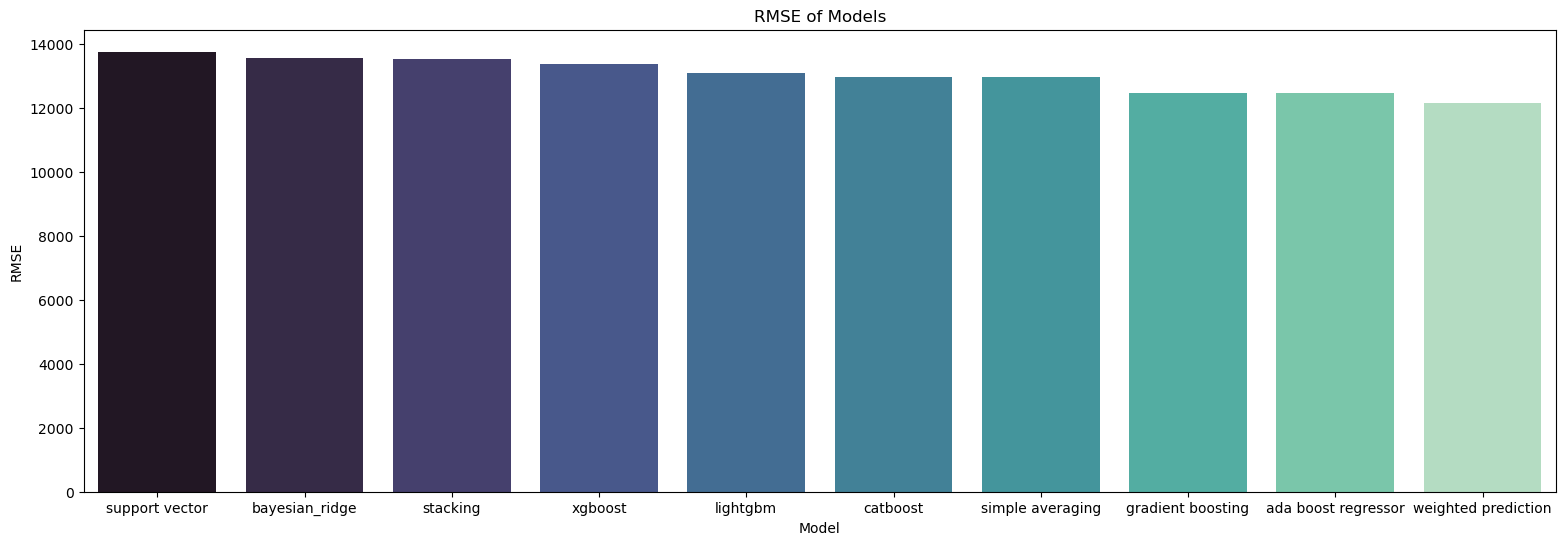

In [63]:
plt.figure(figsize = (19, 6))
sns.barplot(x= results_df2.index[3:], y = results_df2['RMSE'][3:], palette = 'mako')
plt.xlabel('Model')
plt.ylabel('RMSE')
plt.title('RMSE of Models');

## Best Model

The best model is chosen as the Weighted Ensemble Learning with the lowest RMSE. Predictions and residuals will be examined according to the Weighted Ensemble Learning model.

In [64]:
residuals = y_test - weighted_predictions

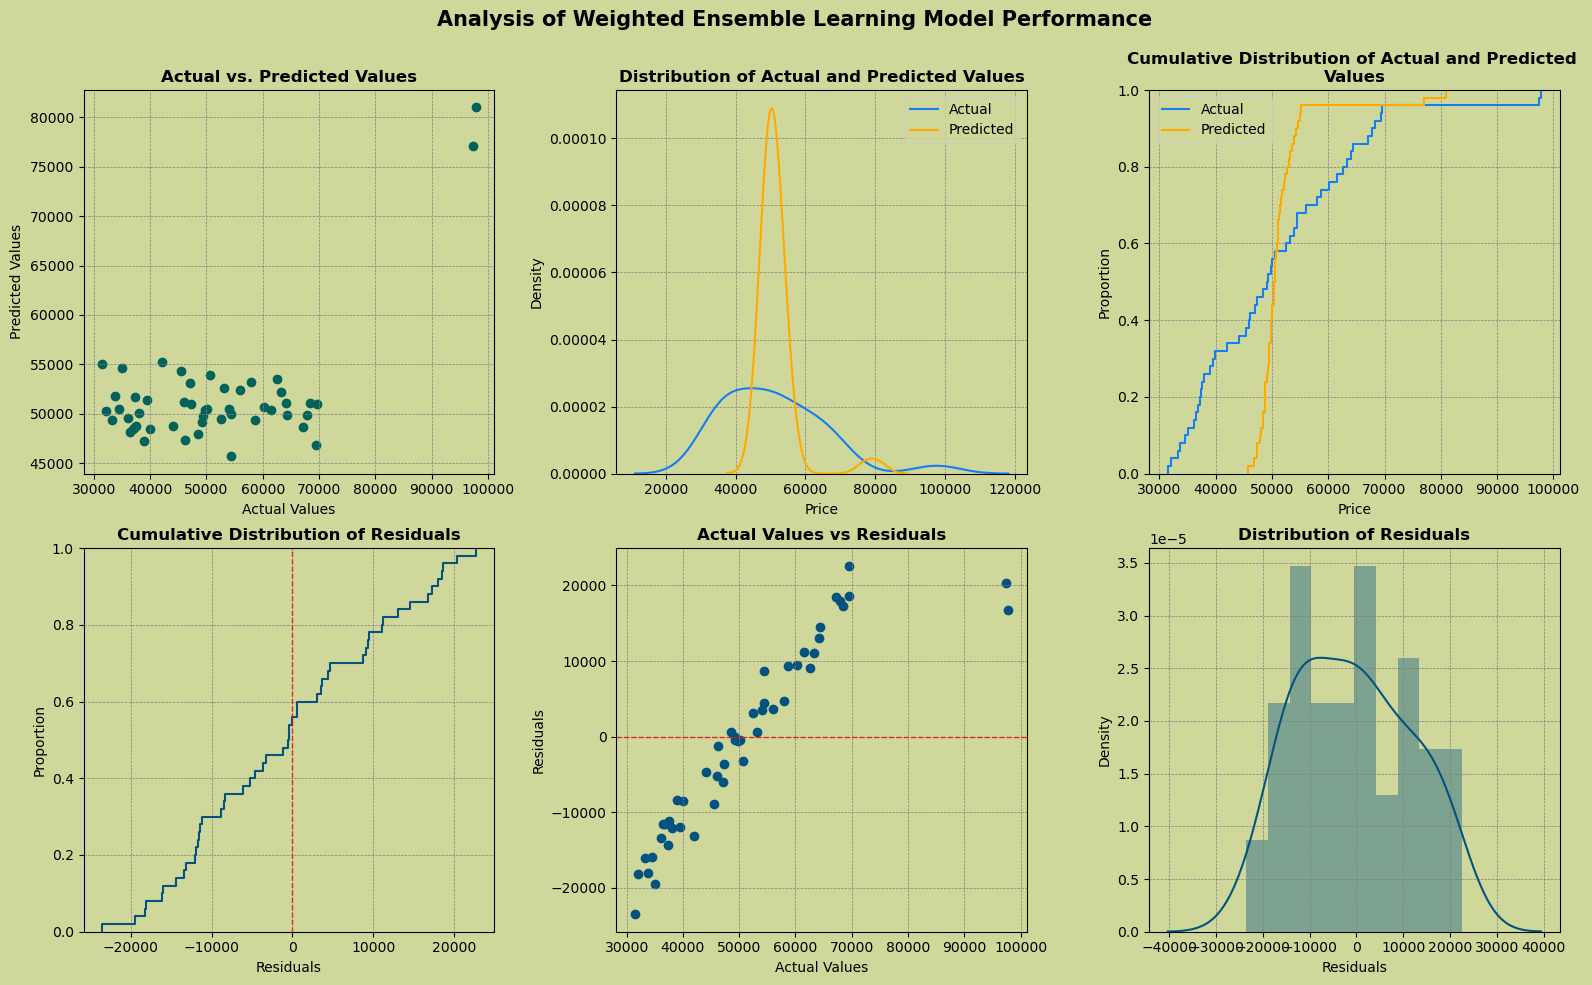

In [65]:
fig,ax=plt.subplots(2,3,figsize=(16,10))
fig.set_facecolor("#cfd89a")

ax[0,0].scatter(y_test, weighted_predictions,c="#03625c")
ax[0,0].set_xlabel('Actual Values')
ax[0,0].set_ylabel('Predicted Values')
ax[0,0].set_title('Actual vs. Predicted Values',weight="bold")
ax[0,0].set_facecolor("#cfd89a")
ax[0,0].grid(True, which='both', linestyle='--', linewidth=0.5, color='gray')
plt.tight_layout()


sns.kdeplot(y_test,label="Actual",ax=ax[0,1],c="#167ef3")
sns.kdeplot(weighted_predictions,label="Predicted",ax=ax[0,1],c="#ffaa00")
ax[0,1].grid(True, which='both', linestyle='--', linewidth=0.5, color='gray')
frame = ax[0,1].legend().get_frame()
frame.set_facecolor("#cfd89a")
ax[0,1].set_facecolor("#cfd89a")
ax[0,1].set_title('Distribution of Actual and Predicted Values',weight="bold")
plt.tight_layout()


sns.ecdfplot(y_test,label="Actual",ax=ax[0,2],c="#167ef3")
sns.ecdfplot(weighted_predictions,label="Predicted",ax=ax[0,2],c="#ffaa00")
ax[0,2].grid(True, which='both', linestyle='--', linewidth=0.5, color='gray')
frame = ax[0,2].legend().get_frame()
frame.set_facecolor("#cfd89a")
ax[0,2].set_facecolor("#cfd89a")
ax[0,2].set_title(f"Cumulative Distribution of Actual and Predicted \nValues",weight="bold")
plt.tight_layout()


sns.ecdfplot(residuals,label="error",ax=ax[1,0],c="#03527f")
ax[1,0].axvline(x=0,ls="--",lw=1,alpha=0.8,color="red")
ax[1,0].grid(True, which='both', linestyle='--', linewidth=0.5, color='gray')
ax[1,0].set_facecolor("#cfd89a")
ax[1,0].set_title("Cumulative Distribution of Residuals",weight="bold")
ax[1,0].set_xlabel("Residuals")
plt.tight_layout()


ax[1,1].scatter(y_test, residuals,c="#03527f")
ax[1,1].axhline(y=0,ls="--",lw=1,alpha=0.8,color="red")
ax[1,1].grid(True, which='both', linestyle='--', linewidth=0.5, color='gray')
ax[1,1].set_xlabel('Actual Values')
ax[1,1].set_ylabel('Residuals')
ax[1,1].set_title('Actual Values vs Residuals',weight="bold")
ax[1,1].set_facecolor("#cfd89a")
plt.tight_layout()


sns.distplot(residuals,ax=ax[1,2],bins=10,color="#03527f")
ax[1,2].grid(True, which='both', linestyle='--', linewidth=0.5, color='gray')
ax[1,2].set_xlabel('Residuals')
ax[1,2].set_title('Distribution of Residuals',weight="bold")
ax[1,2].set_facecolor("#cfd89a")
plt.tight_layout()

fig.suptitle("Analysis of Weighted Ensemble Learning Model Performance",size=15,weight="bold")
plt.subplots_adjust(top=0.90)
plt.savefig("Model_Performance.png",dpi=400)